In [2]:
import gym
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

C:\Users\Joshua\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\ipykernel\pylab\config.py:70: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


In [40]:
#random agent
env = gym.make("Pendulum-v1")
state = env.reset()
num_steps = 200
tot_reward = 0
for s in range(num_steps):
    action = env.action_space.sample()
    new_state, reward, done, info = env.step(action)
    tot_reward += reward
    env.render()
env.close()
print(tot_reward)

-969.781486197149


In [68]:
# q-learning agent training
def conv_state(state, action):
    return (int((state[0]+1 + 2*(np.sign(state[1])+1))*50), int((state[2]+8)*10)), int(action[0]+2)

env = gym.make("Pendulum-v1")
Q = np.random.uniform(low=-1,high=1,size=(500,200,10))

learning_rate = 0.8
discount_rate = 0.8
epsilon = 1
decay_rate = 0.005

EPISODES = 10000
STEPS = 199

rewards = 0
reward_list = []
for episode in range(EPISODES):
    state = env.reset()
    state, tmp = conv_state(state, [0])
    epsilon = np.exp(-decay_rate*episode)
    for s in range(STEPS):
        if random.uniform(0,1) < epsilon:
            action = [env.action_space.sample()]
        else:
            action = [float(np.argmax(Q[state[0],state[1],:])-2)]
        
        new_state, reward, done, info = env.step(action)
        if type(reward)==np.ndarray:
            reward = reward[0]
        rewards += reward
        new_state, action = conv_state(new_state, action)
        
        Q[state[0],state[1],action] += learning_rate * (reward + discount_rate * np.max(Q[new_state[0],new_state[1],:] )
                                         - Q[state[0],state[1],action])

        state = new_state

        if done:
            break
    
    if (episode+1)%100==0:
        print("Reward episode",episode-98,"-",episode+1,":",rewards/100)
        reward_list.append(rewards/100)
        rewards = 0

print("Complete Training!")

Reward episode 1 - 100 : -1235.5179898061645
Reward episode 101 - 200 : -1284.0904978097606
Reward episode 201 - 300 : -1278.2072528481276
Reward episode 301 - 400 : -1281.2725957320392
Reward episode 401 - 500 : -1263.3445563755854
Reward episode 501 - 600 : -1271.9293248464392
Reward episode 601 - 700 : -1266.0574342144746
Reward episode 701 - 800 : -1248.3510713826854
Reward episode 801 - 900 : -1222.5263786588862
Reward episode 901 - 1000 : -1214.539447186907
Reward episode 1001 - 1100 : -1201.8568842744512
Reward episode 1101 - 1200 : -1179.8628174856137
Reward episode 1201 - 1300 : -1109.9098217792964
Reward episode 1301 - 1400 : -974.3296472185948
Reward episode 1401 - 1500 : -946.7354227430277
Reward episode 1501 - 1600 : -864.6514053844944
Reward episode 1601 - 1700 : -871.3721046631866
Reward episode 1701 - 1800 : -913.7887199503618
Reward episode 1801 - 1900 : -848.336588583739
Reward episode 1901 - 2000 : -760.6476860504943
Reward episode 2001 - 2100 : -934.080050375478
Rew

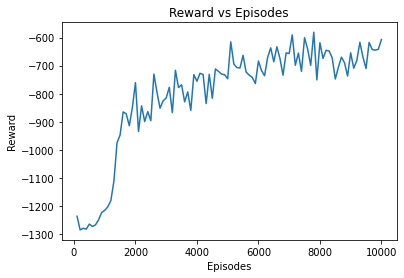

In [69]:
plt.plot(100*(np.arange(len(reward_list))+1), reward_list)
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("Reward vs Episodes")
plt.show()

In [1]:
# test model
env = gym.make("Pendulum-v1")
state = env.reset()
state, tmp = conv_state(state, [0])
done = False
rewards = 0
for s in range(STEPS):
    action = [np.argmax(Q[state[0],state[1],:])-2]
    new_state, reward, done, info = env.step(action)
    
    new_state, tmp = conv_state(new_state, action)
    rewards += reward
    state = new_state
    env.render()

    if done:
        break
env.close()
print(int(abs(rewards)), "penalty")

NameError: name 'gym' is not defined